Python 3.7.1 你的版本至少要3.4以上

Scikit-learn 0.20.0 （你的版本至少要0.19

Graphviz 0.8.4 (没有画不出决策树哦，安装代码conda install python-graphviz

Numpy 1.15.3, Pandas 0.23.4, Matplotlib 3.0.1, SciPy 1.1.0

决策树使用的criterion

$$
Entropy=- \sum_{0}^{c-1} p(i)\log_{2}{p(i)}  \tag{1}
$$


$$
gini　=　1- \sum_{0}^{c-1} p(i)  \tag{2}
$$


from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [34]:
wine = load_wine()
wine.data.shape
wine.target
#如果wine是一张表，应该长这样：
import pandas as pd
table = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
print(table)
print(f"wine.feature_names: {wine.feature_names}")
print(f"wine.target_names: {wine.target_names}")

        0     1     2     3      4     5     6     7     8      9     10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59   
176  13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30  0.60   
177  14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20  0.61   

       11      12  0   
0    3.92  1065.0   0  
1    3.40  1050.0   0  
2    3.17  1185

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [14]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9814814814814815

In [18]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz

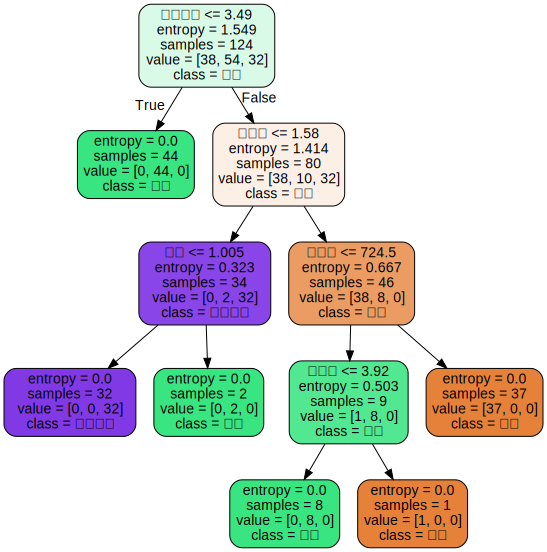

In [19]:
dot_data = tree.export_graphviz(clf
                               ,out_file = None
                               ,feature_names= feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [36]:
#特征重要性
clf.feature_importances_
res = [*zip(feature_name,clf.feature_importances_)]
res

[('酒精', 0.0),
 ('苹果酸', 0.023573638127402874),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.3720161143268239),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.4112805061349741),
 ('色调', 0.05711466826329481),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.13601507314750436)]

In [37]:
res = sorted(res, key=lambda x: x[1], reverse=True)
res

[('颜色强度', 0.4112805061349741),
 ('类黄酮', 0.3720161143268239),
 ('脯氨酸', 0.13601507314750436),
 ('色调', 0.05711466826329481),
 ('苹果酸', 0.023573638127402874),
 ('酒精', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('od280/od315稀释葡萄酒', 0.0)]